In [ ]:
#Milestone 1-Dataset Collection
!pip install yfinance
import yfinance as yf
# Request historical data for past 10 years
data = yf.Ticker("TSLA").history(period='10y')
# Show info
print(data.info())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 721 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2012-12-03 00:00:00-05:00 to 2022-12-01 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Volume        2518 non-null   int64  
 5   Dividends     2518 non-null   int64  
 6   Stock Splits  2518 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 221.9 KB
None


In [ ]:
#Milestone 2- Data Preprocessing and Training
import altair as alt
from google.colab import files
import pandas as pd

In [ ]:
!pip install --upgrade pandas-datareader
from pandas_datareader import data
start = '2018-11-19'
end = '2022-11-16'
source = 'yahoo'
Tesla = data.DataReader("TSLA", start=start ,end=end, data_source=source).reset_index()
microsoft = data.DataReader("MSFT", start=start ,end=end, data_source=source).reset_index()
Tesla['Symbol'] = 'TSLA'
microsoft['Symbol'] = 'MSFT'
stocks = pd.concat(
    [Tesla[['Date','Close','Volume','Symbol']],
     microsoft[['Date','Close','Volume','Symbol']]],
     axis=0)

(alt.
  Chart(stocks).
  mark_line().
  encode(x='Date', y='Close', color='Symbol').
  properties(height=300, width=500))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


alt.Chart(...)

In [ ]:
from pandas_datareader import data
start = '2018-11-22'
end = '2022-11-28'
source = 'yahoo'
Tesla = data.DataReader("TSLA", start=start ,end=end, data_source=source).reset_index()
ToyotaMotor= data.DataReader("TM", start=start ,end=end, data_source=source).reset_index()
GeneralMotor= data.DataReader("GM", start=start ,end=end, data_source=source).reset_index()
Tesla['Symbol'] = 'TSLA'
ToyotaMotor['Symbol'] = 'TM'
GeneralMotor['Symbol'] = 'GM'
stocks = pd.concat(
    [Tesla[['Date','Close','Volume','Symbol']],
     ToyotaMotor[['Date','Close','Volume','Symbol']],
     GeneralMotor[['Date','Close','Volume','Symbol']]],
     axis=0)

(alt.
  Chart(stocks).
  mark_line().
  encode(x='Date', y='Close', color='Symbol').
  properties(height=300, width=500))

alt.Chart(...)

In [ ]:
TSLA_resampled = stocks[stocks.Symbol == 'TSLA'].resample('7D', on='Date').mean().reset_index()
(alt.
  Chart(TSLA_resampled).
  mark_line().
  encode(x='Date', y='Close').
  properties(height=300, width=500))

alt.Chart(...)

In [ ]:
price = (alt.
 Chart(stocks[stocks.Symbol == 'TSLA']).
 mark_line().
 encode(x='Date', y='Close'))
volume = (alt.
 Chart(stocks[stocks.Symbol == 'TSLA']).
 mark_line().
 encode(x='Date', y='Volume'))
price | volume

alt.HConcatChart(...)

In [ ]:
line = (alt.
         Chart(stocks).
         mark_line().
         encode(x='Date', y='Close', color='Symbol').
         properties(height=400, width=500))
avg = (alt.
         Chart(stocks).
         mark_rule().
         encode(y='average(Close)', color='Symbol',   
                size=alt.value(2)))
line + avg

alt.LayerChart(...)

In [ ]:
#Load the dataframe
df= pd.read_csv (r'/content/TSLA Stock data 10yr.csv') 

# New section

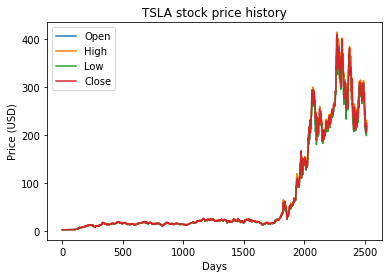

In [ ]:
#Plot data to check history
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df['Open'])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('TSLA stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [ ]:
#returns first n rows for the object based on position in dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-31,1.846667,1.890000,1.824667,1.875333,1.875333,11628000
1,2012-11-01,1.883333,1.966000,1.880000,1.950000,1.950000,15361500
2,2012-11-02,1.951333,1.970000,1.903333,1.928000,1.928000,15454500
3,2012-11-05,1.986667,2.105333,1.955333,2.100000,2.100000,30733500
4,2012-11-06,2.040667,2.080000,1.996667,2.076667,2.076667,34860000


In [ ]:
#Get last n rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
2511,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75529300
2512,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2513,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2514,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500


In [ ]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#Prepare training data
close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.80)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Prepare test data 
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Setting up LSTM Architecture 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 25)                2525      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
######prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
#Training LSTM model
from keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(optimizer='adam', loss='mean_squared_error')
#model.fit(x_train, y_train, batch_size= 1, epochs=3)
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10000,batch_size=50,verbose=1)

Epoch 1/10000
40/40 [==============================] - 14s 219ms/step - loss: 1.2622e-04 - val_loss: 71395.7109
Epoch 2/10000
40/40 [==============================] - 8s 203ms/step - loss: 5.3176e-05 - val_loss: 71377.4375
Epoch 3/10000
40/40 [==============================] - 7s 185ms/step - loss: 6.0883e-05 - val_loss: 71390.4766
Epoch 4/10000
40/40 [==============================] - 8s 195ms/step - loss: 5.5217e-05 - val_loss: 71397.2734
Epoch 5/10000
40/40 [==============================] - 8s 191ms/step - loss: 4.3422e-05 - val_loss: 71400.4766
Epoch 6/10000
40/40 [==============================] - 7s 187ms/step - loss: 4.6571e-05 - val_loss: 71393.4688
Epoch 7/10000
40/40 [==============================] - 9s 235ms/step - loss: 4.0991e-05 - val_loss: 71417.7344
Epoch 8/10000
40/40 [==============================] - 7s 185ms/step - loss: 3.8975e-05 - val_loss: 71372.0625
Epoch 9/10000
40/40 [==============================] - 8s 194ms/step - loss: 3.9841e-05 - val_loss: 71348.4141


In [ ]:
#######Training LSTM model EPOCH: 100
#model.fit(x_train, y_train, batch_size= 1, epochs=3)
#history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=1252,verbose=1)
#history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=60,verbose=1)
#history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=125,verbose=1)
#history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=80,batch_size=140,verbose=1)

Epoch 1/5
2/2 [==============================] - 5s 2s/step - loss: 5.8902e-05 - val_loss: 71372.6094
Epoch 2/5
2/2 [==============================] - 4s 2s/step - loss: 5.1799e-05 - val_loss: 71382.8203
Epoch 3/5
2/2 [==============================] - 4s 2s/step - loss: 4.9711e-05 - val_loss: 71389.6719
Epoch 4/5
2/2 [==============================] - 4s 2s/step - loss: 4.6653e-05 - val_loss: 71391.2969
Epoch 5/5
2/2 [==============================] - 4s 2s/step - loss: 4.6926e-05 - val_loss: 71394.0078


In [ ]:
#Model Evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

16/16 [==============================] - 1s 33ms/step


14.192618191598449

<ipython-input-34-27294da18cd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


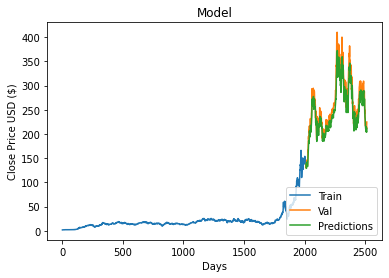

In [ ]:
#Visualizing the predicted price
data = df.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
#plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

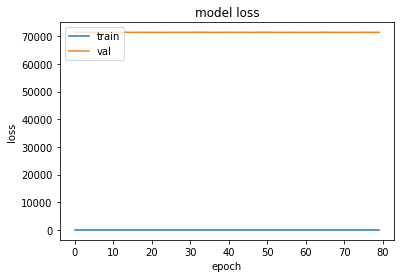

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

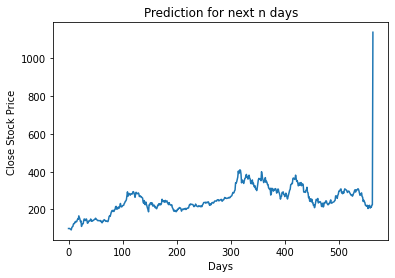

In [ ]:
import sklearn
import numpy as np
original_price = df['Close'].values
x_input=original_price[len(original_price)-30:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=30
i=0
while(i<30):

  if(len(temp_input)>30):
    #print(temp_input)
     x_input=np.array(temp_input[1:])
     x_input=x_input.reshape(1,-1)
     x_input=x_input.reshape((1,n_steps,1))
     yhat=model.predict(x_input,verbose=0)
     temp_input.extend(yhat[0].tolist())
     temp_input=temp_input[1:]
     lst_output.extend(yhat[0].tolist())
     i=i+1
  else:
     x_input=x_input.reshape(1,n_steps,1)
     yhat=model.predict(x_input,verbose=0)
     #print(yhat[0])
     temp_input.extend(yhat[0].tolist())
     #print(len(temp_input))
     lst_output.extend(yhat.tolist())
     i=i+1
     df1=test_data.tolist()
     df1.extend(lst_output)
     df1=scaler.inverse_transform(df1).tolist()
     plt.title('Prediction for next n days')
     plt.ylabel('Close Stock Price')
     plt.xlabel('Days')
     plt.plot(df1)
     fig3=plt.show()
     